In [1]:
import logging
import warnings
import pypsa
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared
from shapely.wkt import loads
from shapely.validation import make_valid
from matplotlib.gridspec import GridSpec

import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [2]:
# path_2030_base=r'C:\Users\hie\pe_tan\pypsa-earth\results\2030_base\networks\elec_s_all_ec_lcopt_1h.nc'
# n_2030_base=pypsa.Network(path_2030_base)

# path_2030_s1=r'C:\Users\hie\pe_tan\pypsa-earth\results\2030_s1\networks\elec_s_all_ec_lcopt_1h.nc'
# n_2030_s1=pypsa.Network(path_2030_s1)

# path_2030_s2=r'C:\Users\hie\pe_tan\pypsa-earth\results\2030_s2\networks\elec_s_all_ec_lcopt_1h.nc'
# n_2030_s2=pypsa.Network(path_2030_s2)

# path_2040_base=r'C:\Users\hie\pe_tan\pypsa-earth\results\2040_base\networks\elec_s_all_ec_lcopt_1h.nc'
# n_2040_base=pypsa.Network(path_2040_base)

# path_2040_s1=r'C:\Users\hie\pe_tan\pypsa-earth\results\2040_s1\networks\elec_s_all_ec_lcopt_1h.nc'
# n_2040_s1=pypsa.Network(path_2040_s1)

# path_2040_s2=r'C:\Users\hie\pe_tan\pypsa-earth\results\2040_s2\networks\elec_s_all_ec_lcopt_1h.nc'
# n_2040_s2=pypsa.Network(path_2040_s2)


In [3]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
brown2 = '#B45419'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
teal1 = '#294839'
green1 = '#6DA08C'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#7A693B'
beige2 = '#A89677'
beige3 = '#D2CDAD'
grey1 = '#E7E7E7'
grey2 = '#D7D7D7'
grey3 = '#C6C6C6'
grey4 = '#939393'
blue1 = '#3EA1C0'


custom_colors = {
    "Biomass": "#0c6013",
    "Hydropower": teal4,
    'Reservoir & Dam': teal4,
    'Run of River': teal4,
    "Hydro": teal4,
    "Natural Gas": brown2,
    "Natural gas": brown2,
    'Combined-Cycle Gas': brown2,
    "CCGT": brown2,
    "Open-Cycle Gas": brown,
    "Diesel and HFO": grey4,
    "Oil": grey4,
    "Solar Pv": "#f9d002",
    "Solar": "#f9d002",
    "Wind": teal2,
    "Onshore Wind": teal2,
    "Coal": "#707070",
    "Biofuels": "#06540d",
    "Kerosene": grey4,
    "Electricity": yellow,
    "Charcoal": brown2,
    "Gas": beige1,
    "Other": teal1,
    "Geothermal": teal3,
}

# custom_colors = {
#     'Reservoir & Dam': '#4C72B0',        # blue
#     'Run of River': '#4adbc8',           # light blue
#     'Biomass': '#60BD68',               # green
#     'Coal': '#707070',                  # charcoal
#     : '#E15759',    # red
#     'Geothermal': '#B07AA1',            # lavender
#     'Oil': '#262626',                   # orange
#     'Onshore Wind': '#59A14F',          # forest green
#     'Open-Cycle Gas': '#d35050',        # light pink
#     'Solar': '#FFD700',                 # golden yellow

from matplotlib.colors import ListedColormap

In [4]:
# import pypsa
# import pandas as pd

# # Define paths to the .nc files
# paths = {
#     "Base_2030": r'C:\\Users\\hie\\pe_tan\\pypsa-earth\\results\\2030_base\\networks\\elec_s_all_ec_lcopt_1h.nc',
#     "Base_2040": r'C:\\Users\\hie\\pe_tan\\pypsa-earth\\results\\2040_base\\networks\\elec_s_all_ec_lcopt_1h.nc',
#     "S1_2030": r'C:\\Users\\hie\\pe_tan\\pypsa-earth\\results\\2030_s1\\networks\\elec_s_all_ec_lcopt_1h.nc',
#     "S1_2040": r'C:\\Users\\hie\\pe_tan\\pypsa-earth\\results\\2040_s1\\networks\\elec_s_all_ec_lcopt_1h.nc',
#     "S2_2030": r'C:\\Users\\hie\\pe_tan\\pypsa-earth\\results\\2030_s2\\networks\\elec_s_all_ec_lcopt_1h.nc',
#     #"S2_2040": r'C:\\Users\\hie\\pe_tan\\pypsa-earth\\results\\2040_s2\\networks\\elec_s_all_ec_lcopt_1h.nc',
# }

# # Function to extract production data from a network for a specific snapshot
# def extract_production(network, start_date, end_date):
#     # Filter the time range
#     generator_production = network.generators_t.p.loc[start_date:end_date]
#     storage_production = network.storage_units_t.p_dispatch.loc[start_date:end_date]

#     # Group production by carrier
#     generator_production = generator_production.groupby(network.generators.carrier, axis=1).sum()
#     storage_production = storage_production.groupby(network.storage_units.carrier, axis=1).sum()

#     # Combine generator and storage production
#     total_production = generator_production.add(storage_production, fill_value=0)

#     # Ensure datetime index
#     total_production.index = pd.to_datetime(total_production.index)
#     return total_production

# # Define the snapshot period
# start_date = "2013-01-01"
# end_date = "2013-01-03"

# for title, data in production_data.items():
#     missing_techs = [tech for tech in ["CCGT", "OCGT", "Geothermal", "Hydro", "Wind", "Solar", "Lost load"] if tech not in data.columns]
#     if missing_techs:
#         print(f"Scenario: {title}, Missing Technologies: {missing_techs}")

# # Dictionary to store production data for each scenario and year
# production_data = {}

# for key, path in paths.items():
#     network = pypsa.Network(path)  # Load the network
#     production_data[key] = extract_production(network, start_date, end_date)  # Extract production data

# # Create the subplots with 2 rows and 3 columns
# fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True, sharey=True)
# axes = axes.flatten()  # Flatten the axes array for easy iteration

# # Define colors and labels
# colors = [beige2, beige3,  brown2, teal2, teal4, yellow, grey4, grey1]
# labels = ["CCGT", "OCGT", "Geothermal", "Hydro", "Wind", "Solar", "Lost load", "Demand"]


# # Loop through the scenarios to create each subplot
# # Loop through the scenarios to create each subplot
# for ax, (title, data) in zip(axes, production_data.items()):
#     # Align data with the index and fill missing values
#     data = data.reindex(data.index).fillna(0)
    
#     # Plot the data using stackplot
#     ax.stackplot(
#         data.index,
#         data.get("CCGT", 0), data.get("OCGT", 0), data.get("Geothermal", 0), data.get("Hydro", 0),
#         data.get("Wind", 0), data.get("Solar", 0), data.get("Biomass", 0), data.get("Battery", 0),
#         data.get("Lost load", 0),
#         colors=colors[:-1], zorder=2
#     )
#     ax.stackplot(data.index, data.get("Demand", 0), colors=[colors[-1]], zorder=2)
#     ax.set_title(title, fontsize=12)
#     ax.set_xlim(start_date, end_date)
#     ax.grid(axis='y', color='lightgrey')
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
#     ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

# # Set common labels
# fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontsize=14)
# fig.text(0.04, 0.5, 'Generation [GW]', va='center', rotation='vertical', ha='center', fontsize=14)

# # Create and place the legend
# patches = [mpatches.Patch(color=color, label=label) for label, color in zip(labels, colors)]
# fig.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=6, fontsize=12)

# # Adjust layout and save the figure
# plt.subplots_adjust(hspace=0.3, wspace=0.2, bottom=0.15)
# plt.savefig('snapshots_6.png', dpi=300, bbox_inches='tight')
# plt.show()

In [5]:
import logging
import os
import pypsa
import pandas as pd
import networkx as nx
import numpy as np

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
from itertools import product
logger = logging.getLogger(__name__)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)


max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

path_2030_base=r'C:\Users\hie\pe_tan\pypsa-earth\results\2030_base\networks\elec_s_all_ec_lcopt_1h.nc'
n_2030_base=pypsa.Network(path_2030_base)

path_2030_s1=r'C:\Users\hie\pe_tan\pypsa-earth\results\2030_s1\networks\elec_s_all_ec_lcopt_1h.nc'
n_2030_s1=pypsa.Network(path_2030_s1)

path_2030_s2=r'C:\Users\hie\pe_tan\pypsa-earth\results\2030_s2\networks\elec_s_all_ec_lcopt_1h.nc'
n_2030_s2=pypsa.Network(path_2030_s2)

path_2040_base=r'C:\Users\hie\pe_tan\pypsa-earth\results\2040_base\networks\elec_s_all_ec_lcopt_1h.nc'
n_2040_base=pypsa.Network(path_2040_base)

path_2040_s1=r'C:\Users\hie\pe_tan\pypsa-earth\results\2040_s1\networks\elec_s_all_ec_lcopt_1h.nc'
n_2040_s1=pypsa.Network(path_2040_s1)

path_2040_s2=r'C:\Users\hie\pe_tan\pypsa-earth\results\2040_s2\networks\elec_s_all_ec_lcopt_1h.nc'
n_2040_s2=pypsa.Network(path_2040_s2)

INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units


In [6]:
scenario_list = [
    (n_2030_base, "Base2030"),
    (n_2030_s1, "S1_2030"),
    (n_2030_s2, "S2_2030"),
    (n_2040_base, "Base2040"),
    (n_2040_s1, "S1_2040"),
    (n_2040_s2, "S2_2040"),
]
scenario_list

[(PyPSA Network 'PyPSA-Earth'
  Components:
   - Bus: 67
   - Carrier: 12
   - Generator: 232
   - Line: 73
   - Load: 67
   - StorageUnit: 16
  Snapshots: 8760,
  'Base2030'),
 (PyPSA Network 'PyPSA-Earth'
  Components:
   - Bus: 67
   - Carrier: 12
   - Generator: 232
   - Line: 73
   - Load: 67
   - StorageUnit: 16
  Snapshots: 8760,
  'S1_2030'),
 (PyPSA Network 'PyPSA-Earth'
  Components:
   - Bus: 67
   - Carrier: 12
   - Generator: 232
   - Line: 73
   - Load: 67
   - StorageUnit: 16
  Snapshots: 8760,
  'S2_2030'),
 (PyPSA Network 'PyPSA-Earth'
  Components:
   - Bus: 67
   - Carrier: 13
   - Generator: 232
   - Line: 73
   - Load: 67
   - StorageUnit: 16
  Snapshots: 8760,
  'Base2040'),
 (PyPSA Network 'PyPSA-Earth'
  Components:
   - Bus: 67
   - Carrier: 13
   - Generator: 232
   - Line: 73
   - Load: 67
   - StorageUnit: 16
  Snapshots: 8760,
  'S1_2040'),
 (PyPSA Network 'PyPSA-Earth'
  Components:
   - Bus: 67
   - Carrier: 13
   - Generator: 232
   - Line: 73
   - Load:

In [7]:
#production
def filter_production(scenario_pypsa,scenario_name):
    production_pypsa = pd.DataFrame(scenario_pypsa.statistics.dispatch())
    production_pypsa = production_pypsa.drop(index=['Line','Load'], level=0)
    production_pypsa = production_pypsa.reset_index(level=0, drop=True)
    production_pypsa.rename(columns={0:('GWh - PyPSA')}, inplace=True)
    production_pypsa.index.name = "Technology"
    production_pypsa = production_pypsa.drop(index=['load'])
    #production_pypsa['GWh - PyPSA-BO'] = production_pypsa['GWh - PyPSA']/1000
    #production_pypsa.loc['Total'] = production_pypsa['TWh - PyPSA'].sum()
    production_pypsa.rename(columns={'GWh - PyPSA':(scenario_name)}, inplace=True)

    return production_pypsa

test = filter_production(n_2030_base,"Base2030")
test

C:\Users\hie\AppData\Local\Temp\ipykernel_24048\2917656902.py:3: DeprecatedWarning:

dispatch is deprecated as of 0.28 and will be removed in 0.29. Use 'energy_balance' instead.



,Base2030
Technology,
Coal,1.304007e+06
Combined-Cycle Gas,1.098544e+06
Geothermal,7.739585e+06
Onshore Wind,5.863826e+05
Open-Cycle Gas,4.588869e+02
Run of River,2.215429e+06
Solar,1.254343e+06
Reservoir & Dam,1.377570e+07


In [8]:
filtered_production_dict = {}

for scenario,name in scenario_list:
    filtered_production = filter_production(scenario, name)
    filtered_production_dict[name] = filtered_production

combined_production = pd.concat(filtered_production_dict.values(), axis=1)
combined_production


C:\Users\hie\AppData\Local\Temp\ipykernel_24048\2917656902.py:3: DeprecatedWarning:

dispatch is deprecated as of 0.28 and will be removed in 0.29. Use 'energy_balance' instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_24048\2917656902.py:3: DeprecatedWarning:

dispatch is deprecated as of 0.28 and will be removed in 0.29. Use 'energy_balance' instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_24048\2917656902.py:3: DeprecatedWarning:

dispatch is deprecated as of 0.28 and will be removed in 0.29. Use 'energy_balance' instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_24048\2917656902.py:3: DeprecatedWarning:

dispatch is deprecated as of 0.28 and will be removed in 0.29. Use 'energy_balance' instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_24048\2917656902.py:3: DeprecatedWarning:

dispatch is deprecated as of 0.28 and will be removed in 0.29. Use 'energy_balance' instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_24048\2917656902.py:3: DeprecatedWarning:

dispatch is deprecat

,Base2030,S1_2030,S2_2030,Base2040,S1_2040,S2_2040
Technology,,,,,,
Coal,1.304007e+06,1.908617e+06,2.857653e+06,5.269048e+06,5.270372e+06,3.716509e+07
Combined-Cycle Gas,1.098544e+06,1.392957e+06,2.958215e+06,3.549498e+07,4.092177e+07,2.037650e+07
Geothermal,7.739585e+06,7.925410e+06,8.028962e+06,8.707822e+06,8.707560e+06,8.709348e+06
Onshore Wind,5.863826e+05,6.220218e+05,6.722654e+05,9.130155e+05,9.469670e+05,1.022072e+06
Open-Cycle Gas,4.588869e+02,7.980817e+02,1.485326e+03,4.066085e+05,3.838468e+05,3.081847e+03
Run of River,2.215429e+06,2.257952e+06,2.319219e+06,2.920437e+06,2.929570e+06,2.941126e+06
Solar,1.254343e+06,1.352152e+06,1.521471e+06,3.118284e+06,3.273858e+06,3.511654e+06
Reservoir & Dam,1.377570e+07,1.469321e+07,1.619537e+07,1.829911e+07,1.830198e+07,1.830876e+07


Missing technologies: []


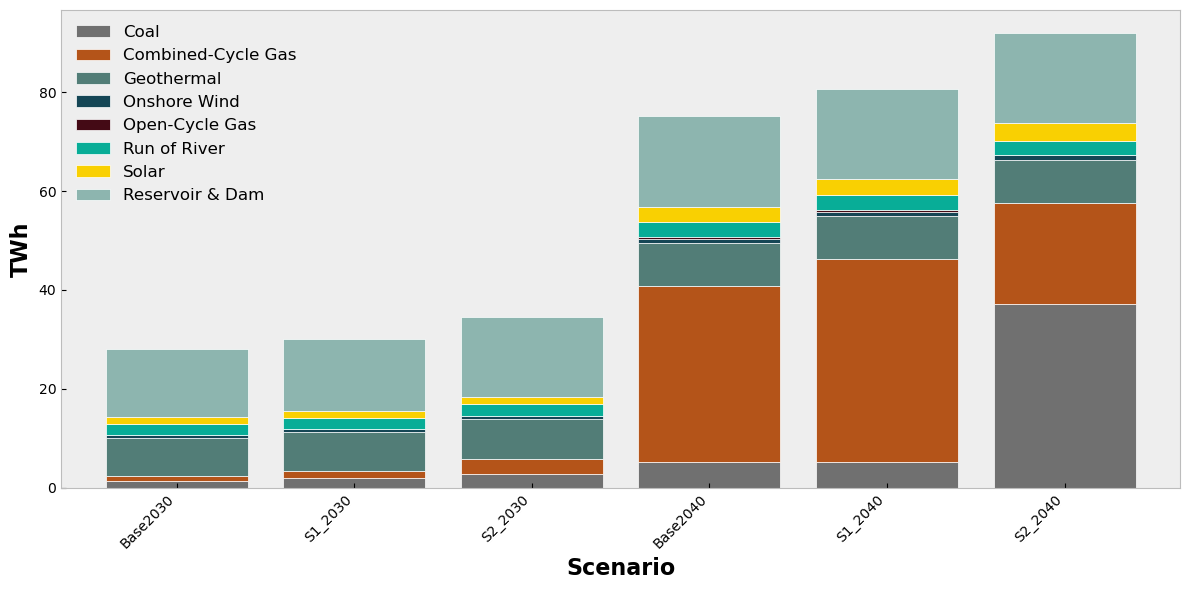

In [9]:
import matplotlib.pyplot as plt

# Transpose the combined production DataFrame for easier plotting
combined_production_transposed = combined_production.T/1e6  # Convert to TWh


custom_colors = {
    "Biomass": "#0c6013",
    "Hydropower": teal4,
    'Reservoir & Dam': teal4,
    'Run of River': '#08ad97',
    "Hydro": teal4,
    "Natural Gas": brown2,
    "Natural gas": brown2,
    'Combined-Cycle Gas': brown2,
    "CCGT": brown2,
    "Open-Cycle Gas": brown,
    "Diesel and HFO": grey4,
    "Oil": grey4,
    "Solar Pv": "#f9d002",
    "Solar": "#f9d002",
    "Wind": teal2,
    "Onshore Wind": teal2,
    "Coal": "#707070",
    "Biofuels": "#06540d",
    "Kerosene": grey4,
    "Electricity": yellow,
    "Charcoal": brown2,
    "Gas": beige1,
    "Other": teal1,
    "Geothermal": teal3,
}


missing_technologies = [
    tech for tech in combined_production_transposed.columns if tech not in custom_colors
]
print("Missing technologies:", missing_technologies)
# Plot setup
fig, ax = plt.subplots(figsize=(12, 6),)
combined_production_transposed.plot(
    kind='bar', 
    stacked=True,
    width=0.8, 
    ax=ax, 
    color=[custom_colors[col] for col in combined_production_transposed.columns], 
    edgecolor='white',
    
)

# Customize the plot
ax.set_title("", fontsize=16)
ax.set_ylabel("TWh", fontsize=16, fontweight='bold')
ax.set_xlabel("Scenario", fontsize=16, fontweight='bold')
ax.legend(title="", title_fontsize=12,
    fontsize=12, loc='upper left', frameon=False)
ax.grid(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
#colors = [beige2, beige3, teal3, beige1, teal4, yellow, teal2, brown, brown, brown2, grey4, grey1]
#names = ['CCGT',    'OCGT',  'Biomass',   'Oil',  'Wind',  'Solar'  ,'Hydro', 'Battery', 'Nbattery', 'Geothermal', 'Lost load', 'Demand']

In [11]:
#MW
def filter_capacities(scenario_pypsa,scenario_name):
    capacities_pypsa = pd.DataFrame(scenario_pypsa.statistics.optimal_capacity() - scenario_pypsa.statistics.installed_capacity())

    capacities_pypsa = capacities_pypsa.drop(index=['Line','Load'], level=0)
    capacities_pypsa = capacities_pypsa.reset_index(level=0, drop=True)
    capacities_pypsa.rename(columns={0:(scenario_name)}, inplace=True)
    capacities_pypsa.index.name = "Technology"
    capacities_pypsa = capacities_pypsa.drop(index=['load'])
    #capacities_pypsa = capacities_pypsa.drop(index=['battery charger'])
    #capacities_pypsa = capacities_pypsa.drop(index=['H2 electrolysis'])
    capacities_pypsa.rename(columns={'GWh - PyPSA':(scenario_name)}, inplace=True)

    return capacities_pypsa

test = filter_capacities(n_2030_base,"Base2030")
test

,Base2030
Technology,
Coal,0.000641
Combined-Cycle Gas,1.800916
Geothermal,860.000000
Onshore Wind,1369.088941
Open-Cycle Gas,0.000000
Run of River,0.000000
Solar,2985.527629
Reservoir & Dam,0.000000


In [12]:
filtered_capacities_dict = {}

for scenario,name in scenario_list:
    filtered_capacities = filter_capacities(scenario, name)
    filtered_capacities_dict[name] = filtered_capacities

combined_capacity = pd.concat(filtered_capacities_dict.values(), axis=1)
combined_capacity


,Base2030,S1_2030,S2_2030,Base2040,S1_2040,S2_2040
Technology,,,,,,
Coal,0.000641,0.000595,0.001586,2.086017,2.221721,3699.998641
Combined-Cycle Gas,1.800916,4.212914,0.517424,3832.564664,4565.995883,5007.286565
Geothermal,860.000000,860.000000,860.000000,860.000000,860.000000,860.000001
Onshore Wind,1369.088941,1369.088935,1369.088943,1369.088950,1369.088946,1369.089001
Open-Cycle Gas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Run of River,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Solar,2985.527629,2985.527740,2985.527694,2985.527825,2985.527822,2985.527860
Reservoir & Dam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


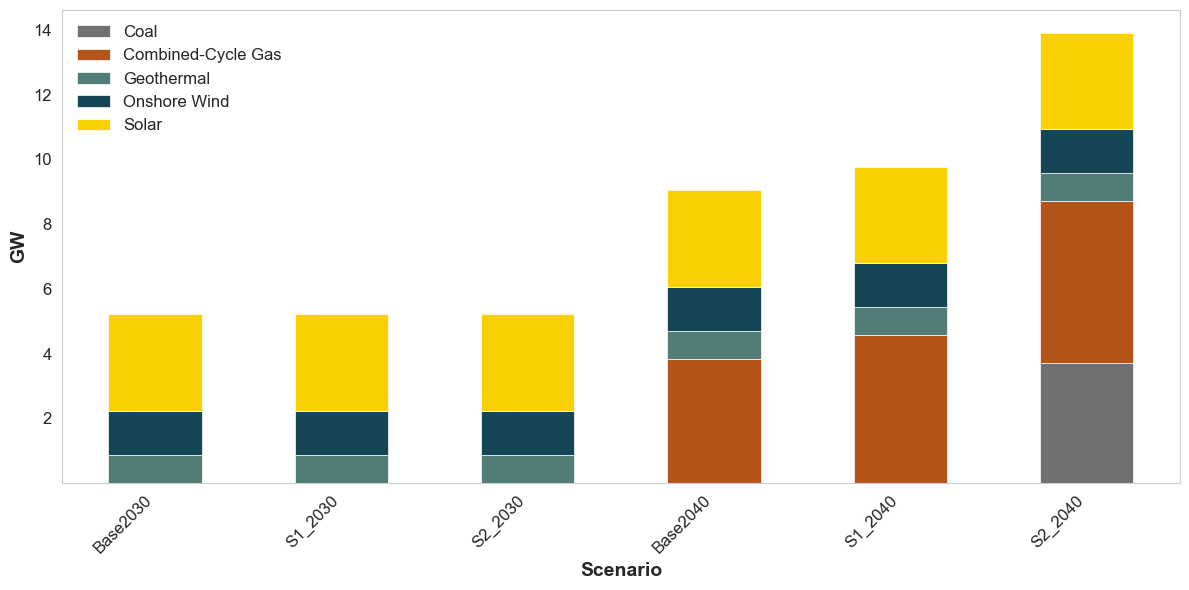

In [13]:
# Define preferred scenario order
combined_capcity=combined_capacity
scenario_order = ['Base2030' , 'S1_2030','S2_2030', 'Base2040','S1_2040',  'S2_2040']
combined_capacity_transposed = combined_capacity[scenario_order].T

# Custom color palette by technology (adjust as needed)
# custom_colors = {
#     'Reservoir & Dam': '#4C72B0',        # blue
#     'Run of River': '#4adbc8',           # light blue
#     'Biomass': '#60BD68',               # green
#     'Coal': '#707070',                  # charcoal
#     'Combined-Cycle Gas': '#E15759',    # red
#     'Geothermal': '#B07AA1',            # lavender
#     'Oil': '#262626',                   # orange
#     'Onshore Wind': '#59A14F',          # forest green
#     'Open-Cycle Gas': '#d35050',        # light pink
#     'Solar': '#FFD700',                 # golden yellow
# }

# Match color list to the column order in the DataFrame
#color_list = [custom_colors[tech] for tech in combined_capacity_transposed.columns]

combined_capacity=combined_capacity_transposed/1e3  # Convert to GW

# Filter out technologies with zero total values
combined_capacity_filtered = combined_capacity.loc[:, (combined_capacity.sum(axis=0) > 0)]

# Match colors to the filtered technologies
color_list_filtered = [custom_colors[tech] for tech in combined_capacity_filtered.columns]
sns.set_style("whitegrid")
# Plot the filtered DataFrame
fig, ax = plt.subplots(figsize=(12, 6))

combined_capacity_filtered.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=color_list_filtered,
    edgecolor="white"
)

# Customize plot
ax.set_title("", fontsize=16)
ax.set_ylabel("GW", fontsize=14, fontweight='bold')
ax.set_xlabel("Scenario", fontsize=14, fontweight='bold')
ax.set_xticklabels(combined_capacity_filtered.index, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Update legend based on filtered technologies
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", loc='upper left', fontsize=12, title_fontsize=12, frameon=False)

ax.grid(False)
plt.tight_layout()
plt.show()

In [14]:
#total capacity
def total_capacities(scenario_pypsa,scenario_name):
    capacities_pypsa = pd.DataFrame(scenario_pypsa.statistics.optimal_capacity())

    capacities_pypsa = capacities_pypsa.drop(index=['Line','Load'], level=0)
    capacities_pypsa = capacities_pypsa.reset_index(level=0, drop=True)
    capacities_pypsa.rename(columns={0:(scenario_name)}, inplace=True)
    capacities_pypsa.index.name = "Technology"
    capacities_pypsa = capacities_pypsa.drop(index=['load'])
    #capacities_pypsa = capacities_pypsa.drop(index=['battery charger'])
    #capacities_pypsa = capacities_pypsa.drop(index=['H2 electrolysis'])
    capacities_pypsa.rename(columns={'GWh - PyPSA':(scenario_name)}, inplace=True)

    return capacities_pypsa

test = total_capacities(n_2030_base,"Base2030")
print(test)


                       Base2030
Technology                     
Coal                 600.000641
Combined-Cycle Gas  1194.500916
Geothermal           995.000000
Onshore Wind        1370.000008
Open-Cycle Gas       185.000000
Run of River         601.786242
Solar               2999.999816
Reservoir & Dam     4340.625972


In [15]:
# Total capacity function
def total_capacities(scenario_pypsa, scenario_name):
    # Extract optimal capacity
    capacities_pypsa = pd.DataFrame(scenario_pypsa.statistics.optimal_capacity())
    
    # Debug: Print initial DataFrame
    print(f"Initial capacities for {scenario_name}:\n", capacities_pypsa.head())
    
    # Drop unwanted indices
    try:
        capacities_pypsa = capacities_pypsa.drop(index=['Line', 'Load'], level=0)
    except KeyError as e:
        print(f"KeyError while dropping indices in {scenario_name}: {e}")
    
    capacities_pypsa = capacities_pypsa.reset_index(level=0, drop=True)
    
    # Rename columns
    capacities_pypsa.rename(columns={0: scenario_name}, inplace=True)
    capacities_pypsa.index.name = "Technology"
    
    # Drop additional unwanted rows
    try:
        capacities_pypsa = capacities_pypsa.drop(index=['load'])
    except KeyError as e:
        print(f"KeyError while dropping 'load' in {scenario_name}: {e}")
    
    # Debug: Print processed DataFrame
    print(f"Processed capacities for {scenario_name}:\n", capacities_pypsa.head())
    
    return capacities_pypsa







# Dictionary to store total capacities
total_capacities_dict = {}

# Loop through scenarios
for scenario, name in scenario_list:
    total_capacity = total_capacities(scenario, name)
    total_capacities_dict[name] = total_capacity

# Concatenate results
try:
    total_capacity = pd.concat(total_capacities_dict.values(), axis=1)
    print("Combined total capacities:\n", total_capacity.head())
except Exception as e:
    print(f"Error during concatenation: {e}")

Initial capacities for Base2030:
                                         0
component carrier                        
Generator Coal                 600.000641
          Combined-Cycle Gas  1194.500916
          Geothermal           995.000000
          Onshore Wind        1370.000008
          Open-Cycle Gas       185.000000
Processed capacities for Base2030:
                        Base2030
Technology                     
Coal                 600.000641
Combined-Cycle Gas  1194.500916
Geothermal           995.000000
Onshore Wind        1370.000008
Open-Cycle Gas       185.000000
Initial capacities for S1_2030:
                                         0
component carrier                        
Generator Coal                 600.000595
          Combined-Cycle Gas  1196.912914
          Geothermal           995.000000
          Onshore Wind        1370.000002
          Open-Cycle Gas       185.000000
Processed capacities for S1_2030:
                         S1_2030
Technology        

In [16]:
n_2030_base.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Coal                    6.000006e+02        6.000000e+02   
            Combined-Cycle Gas      1.194501e+03        1.192700e+03   
            Geothermal              9.950000e+02        1.350000e+02   
            Onshore Wind            1.370000e+03        9.110670e-01   
            Open-Cycle Gas          1.850000e+02        1.850000e+02   
            Run of River            6.017862e+02        6.017862e+02   
            Solar                   3.000000e+03        1.447219e+01   
            load                    6.700000e+10        6.700000e+10   
Line        AC                      3.876245e+04        3.477151e+04   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         4.340626e+03        4.340626e+03   

                                      Supply    Withdrawal      Dispatch  \
Generator   Coal                1.304007e+06  0.000000e+00  1.304007e+06   
            Combined-Cycle Gas  1.098544e+06  0.000000e+00  1.098544e+06   
            Geothermal          7.739585e+06  0.000000e+00  7.739585e+06   
            Onshore Wind        5.863826e+05  0.000000e+00  5.863826e+05   
            Open-Cycle Gas      4.588869e+02  0.000000e+00  4.588869e+02   
            Run of River        2.215429e+06  0.000000e+00  2.215429e+06   
            Solar               1.254343e+06  0.000000e+00  1.254343e+06   
            load                7.683951e+05  0.000000e+00  7.683951e+05   
Line        AC                  1.006589e+08  1.006589e+08  0.000000e+00   
Load        -                   0.000000e+00  2.874284e+07 -2.874284e+07   
StorageUnit Reservoir & Dam     1.377570e+07  0.000000e+00  1.377570e+07   

                                Transmission  Capacity Factor   Curtailment  \
Generator   Coal                0.000000e+00         0.248098  0.000000e+00   
            Combined-Cycle Gas  0.000000e+00         0.104985  0.000000e+00   
            Geothermal          0.000000e+00         0.887954  0.000000e+00   
            Onshore Wind        0.000000e+00         0.048860  3.772597e+05   
            Open-Cycle Gas      0.000000e+00         0.000283  0.000000e+00   
            Run of River        0.000000e+00         0.420254  7.697634e+05   
            Solar               0.000000e+00         0.047730  3.146430e+06   
            load                0.000000e+00         0.000001  0.000000e+00   
Line        AC                 -6.673966e+06         0.296440  0.000000e+00   
Load        -                   0.000000e+00              NaN  0.000000e+00   
StorageUnit Reservoir & Dam     0.000000e+00         0.362291  0.000000e+00   

                                Capital Expenditure  Operational Expenditure  \
Generator   Coal                       2.648998e+08             4.201827e+07   
            Combined-Cycle Gas         1.507243e+08             5.142656e+07   
            Geothermal                 0.000000e+00             7.382461e+04   
            Onshore Wind               1.775253e+08             1.428904e+04   
            Open-Cycle Gas             1.090340e+07             2.968707e+04   
            Run of River               2.465120e+08             2.267332e+04   
            Solar                      1.448679e+08             2.454522e+04   
            load                       0.000000e+00             6.147168e+12   
Line        AC                         2.335230e+08             0.000000e+00   
Load        -                          0.000000e+00             0.000000e+00   
StorageUnit Reservoir & Dam            0.000000e+00             1.339627e+05   

                                     Revenue  Market Value  
Generator   Coal                4.200437e+07  3.221177e+01  
            Combined-Cycle Gas  5.121840e+07  4.662390e+01  
            Geothermal          9.158859e+07  1.183379e+01  
            Onshore Wind        2.031519e+12  3.464494e+06  
            Open-Cycle Gas      7.78405

In [17]:
n_2030_s1.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Coal                    6.000006e+02        6.000000e+02   
            Combined-Cycle Gas      1.196913e+03        1.192700e+03   
            Geothermal              9.950000e+02        1.350000e+02   
            Onshore Wind            1.370000e+03        9.110670e-01   
            Open-Cycle Gas          1.850000e+02        1.850000e+02   
            Run of River            6.017862e+02        6.017862e+02   
            Solar                   3.000000e+03        1.447219e+01   
            load                    6.700000e+10        6.700000e+10   
Line        AC                      3.954949e+04        3.477151e+04   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         4.340626e+03        4.340626e+03   

                                      Supply    Withdrawal      Dispatch  \
Generator   Coal                1.908617e+06  0.000000e+00  1.908617e+06   
            Combined-Cycle Gas  1.392957e+06  0.000000e+00  1.392957e+06   
            Geothermal          7.925410e+06  0.000000e+00  7.925410e+06   
            Onshore Wind        6.220218e+05  0.000000e+00  6.220218e+05   
            Open-Cycle Gas      7.980817e+02  0.000000e+00  7.980817e+02   
            Run of River        2.257952e+06  0.000000e+00  2.257952e+06   
            Solar               1.352152e+06  0.000000e+00  1.352152e+06   
            load                8.787010e+05  0.000000e+00  8.787010e+05   
Line        AC                  1.087462e+08  1.087462e+08  0.000000e+00   
Load        -                   0.000000e+00  3.103182e+07 -3.103182e+07   
StorageUnit Reservoir & Dam     1.469321e+07  0.000000e+00  1.469321e+07   

                                Transmission  Capacity Factor   Curtailment  \
Generator   Coal                0.000000e+00         0.363131  0.000000e+00   
            Combined-Cycle Gas  0.000000e+00         0.132853  0.000000e+00   
            Geothermal          0.000000e+00         0.909274  0.000000e+00   
            Onshore Wind        0.000000e+00         0.051830  3.401595e+05   
            Open-Cycle Gas      0.000000e+00         0.000492  0.000000e+00   
            Run of River        0.000000e+00         0.428320  7.272406e+05   
            Solar               0.000000e+00         0.051452  3.046411e+06   
            load                0.000000e+00         0.000001  0.000000e+00   
Line        AC                 -6.526354e+06         0.313884  0.000000e+00   
Load        -                   0.000000e+00              NaN  0.000000e+00   
StorageUnit Reservoir & Dam     0.000000e+00         0.386421  0.000000e+00   

                                Capital Expenditure  Operational Expenditure  \
Generator   Coal                       2.648998e+08             6.150026e+07   
            Combined-Cycle Gas         1.510287e+08             6.520901e+07   
            Geothermal                 0.000000e+00             7.594564e+04   
            Onshore Wind               1.775253e+08             1.515783e+04   
            Open-Cycle Gas             1.090340e+07             5.163081e+04   
            Run of River               2.465120e+08             2.313274e+04   
            Solar                      1.448679e+08             2.644298e+04   
            load                       0.000000e+00             7.029617e+12   
Line        AC                         2.369487e+08             0.000000e+00   
Load        -                          0.000000e+00             0.000000e+00   
StorageUnit Reservoir & Dam            0.000000e+00             1.428881e+05   

                                     Revenue  Market Value  
Generator   Coal                7.971679e+07  4.176678e+01  
            Combined-Cycle Gas  6.495165e+07  4.662860e+01  
            Geothermal          1.670003e+08  2.107151e+01  
            Onshore Wind        2.216544e+12  3.563450e+06  
            Open-Cycle Gas      2.29490

In [18]:
n_2030_s2.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Coal                    6.000016e+02        6.000000e+02   
            Combined-Cycle Gas      1.193217e+03        1.192700e+03   
            Geothermal              9.950000e+02        1.350000e+02   
            Onshore Wind            1.370000e+03        9.110670e-01   
            Open-Cycle Gas          1.850000e+02        1.850000e+02   
            Run of River            6.017862e+02        6.017862e+02   
            Solar                   3.000000e+03        1.447219e+01   
            load                    6.700000e+10        6.700000e+10   
Line        AC                      4.304270e+04        3.477151e+04   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         4.340626e+03        4.340626e+03   

                                      Supply    Withdrawal      Dispatch  \
Generator   Coal                2.857653e+06  0.000000e+00  2.857653e+06   
            Combined-Cycle Gas  2.958215e+06  0.000000e+00  2.958215e+06   
            Geothermal          8.028962e+06  0.000000e+00  8.028962e+06   
            Onshore Wind        6.722654e+05  0.000000e+00  6.722654e+05   
            Open-Cycle Gas      1.485326e+03  0.000000e+00  1.485326e+03   
            Run of River        2.319219e+06  0.000000e+00  2.319219e+06   
            Solar               1.521471e+06  0.000000e+00  1.521471e+06   
            load                1.122449e+06  0.000000e+00  1.122449e+06   
Line        AC                  1.225415e+08  1.225415e+08  0.000000e+00   
Load        -                   0.000000e+00  3.567709e+07 -3.567709e+07   
StorageUnit Reservoir & Dam     1.619537e+07  0.000000e+00  1.619537e+07   

                                 Transmission  Capacity Factor   Curtailment  \
Generator   Coal                     0.000000         0.543692  0.000000e+00   
            Combined-Cycle Gas       0.000000         0.283013  0.000000e+00   
            Geothermal               0.000000         0.921154  0.000000e+00   
            Onshore Wind             0.000000         0.056017  2.967480e+05   
            Open-Cycle Gas           0.000000         0.000917  0.000000e+00   
            Run of River             0.000000         0.439942  6.659728e+05   
            Solar                    0.000000         0.057895  2.879870e+06   
            load                     0.000000         0.000002  0.000000e+00   
Line        AC                 -285502.519095         0.324997  0.000000e+00   
Load        -                        0.000000              NaN  0.000000e+00   
StorageUnit Reservoir & Dam          0.000000         0.425926  0.000000e+00   

                                Capital Expenditure  Operational Expenditure  \
Generator   Coal                       2.649003e+08             9.208049e+07   
            Combined-Cycle Gas         1.505624e+08             1.384835e+08   
            Geothermal                 0.000000e+00             7.634809e+04   
            Onshore Wind               1.775253e+08             1.638348e+04   
            Open-Cycle Gas             1.090340e+07             9.609116e+04   
            Run of River               2.465120e+08             2.383639e+04   
            Solar                      1.448679e+08             2.961252e+04   
            load                       0.000000e+00             8.979600e+12   
Line        AC                         2.517668e+08             0.000000e+00   
Load        -                          0.000000e+00             0.000000e+00   
StorageUnit Reservoir & Dam            0.000000e+00             1.568863e+05   

                                     Revenue  Market Value  
Generator   Coal                1.180002e+08  4.129271e+01  
            Combined-Cycle Gas  1.391019e+08  4.702225e+01  
            Geothermal          2.076540e+08  2.586312e+01  
            Onshore Wind        2.544722e+12  3.785293e+06  
            Open-Cycle Gas 

Technology         Coal  Combined-Cycle Gas  Geothermal  Onshore Wind  \
Base2030     600.000641         1194.500916  995.000000   1370.000008   
S1_2030      600.000595         1196.912914  995.000000   1370.000002   
S2_2030      600.001586         1193.217424  995.000000   1370.000010   
Base2040     602.086017         5025.264664  995.000000   1370.000017   
S1_2040      602.221721         5758.695883  995.000000   1370.000013   
S2_2040     4299.998641         6199.986565  995.000001   1370.000068   

Technology  Open-Cycle Gas  Run of River        Solar  Reservoir & Dam  
Base2030             185.0    601.786242  2999.999816      4340.625972  
S1_2030              185.0    601.786242  2999.999927      4340.625972  
S2_2030              185.0    601.786242  2999.999882      4340.625972  
Base2040             185.0    601.786242  3000.000012      4340.625972  
S1_2040              185.0    601.786242  3000.000009      4340.625972  
S2_2040              185.0    601.786242  3000.000

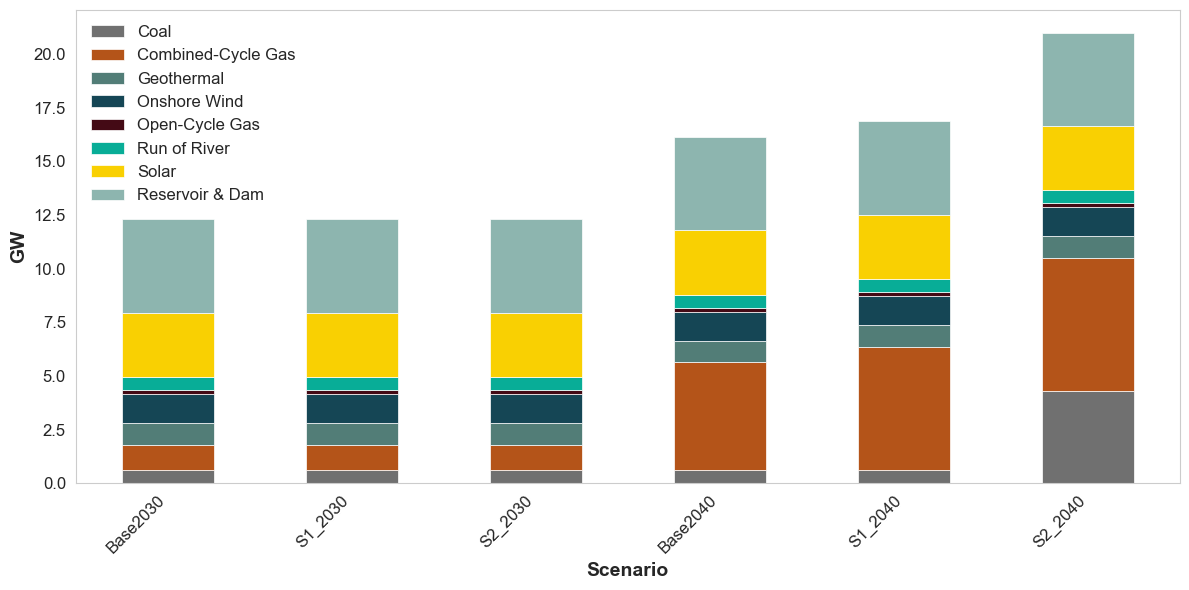

In [19]:
# Define preferred scenario order

scenario_order = ['Base2030' , 'S1_2030','S2_2030', 'Base2040','S1_2040',  'S2_2040']
total_capacity_transposed =total_capacity[scenario_order].T
print(total_capacity_transposed)
# Custom color palette by technology (adjust as needed)
# custom_colors = {
#     'Reservoir & Dam': '#4C72B0',        # blue
#     'Run of River': '#4adbc8',           # light blue
#     'Biomass': '#60BD68',               # green
#     'Coal': '#707070',                  # charcoal
#     'Combined-Cycle Gas': '#E15759',    # red
#     'Geothermal': '#B07AA1',            # lavender
#     'Oil': '#262626',                   # orange
#     'Onshore Wind': '#59A14F',          # forest green
#     'Open-Cycle Gas': '#d35050',        # light pink
#     'Solar': '#FFD700',                 # golden yellow
# }

# Match color list to the column order in the DataFrame
color_list = [custom_colors[tech] for tech in total_capacity_transposed.columns]

total_capacity=total_capacity_transposed/1e3 #GW
# Plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
total_capacity.plot(
    kind='bar', 
    stacked=True, 
    ax=ax,
    color=color_list,
    #facecolor="whitesmoke",
    edgecolor="white",
)

# Customize plot
ax.set_title("", fontsize=16)
ax.set_ylabel("GW", fontsize=14,fontweight='bold')
ax.set_xlabel("Scenario", fontsize=14,fontweight='bold')
ax.set_xticklabels(total_capacity.index, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Legend styling
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", loc='upper left', fontsize=12, title_fontsize=12, frameon=False)
ax.grid(False)
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd



# 2) Extract two Series (both indexed by (component, carrier))
opt  = n_2040_base.statistics.optimal_capacity()  # p_nom_opt sums
inst = n_2040_s2.statistics.installed_capacity()   # p_nom sums

# 3) Put them in one DataFrame for easy dropping
caps = pd.DataFrame({
    "Optimal Capacity":   opt,
    "Installed Capacity": inst
})

# 4) Drop all Lines and the Load component...
caps = caps.drop(index=["Line", "Load"], level=0)
#  ...and drop the 'load' carrier under Generator
caps = caps.drop(index=("Generator", "load"))

# 5) Sum each column (MW → GW)
totals = caps.sum() / 1e3
print(totals)

#print(f"Total optimised capacity:   {totals['Optimal Capacity']:.2f} GW")
#print(f"Total installed capacity:   {totals['Installed Capacity']:.2f} GW")


Optimal Capacity      16.119763
Installed Capacity     7.070495
dtype: float64


In [21]:
import pandas as pd



# 2) Extract two Series (both indexed by (component, carrier))
opt  = n_2030_base.statistics.optimal_capacity()  # p_nom_opt sums
inst = n_2030_base.statistics.installed_capacity()   # p_nom sums

# 3) Put them in one DataFrame for easy dropping
caps = pd.DataFrame({
    "Optimal Capacity":   opt,
    "Installed Capacity": inst
})

# 4) Drop all Lines and the Load component...
caps = caps.drop(index=["Line", "Load"], level=0)
#  ...and drop the 'load' carrier under Generator
caps = caps.drop(index=("Generator", "load"))

# 5) Sum each column (MW → GW)
totals = caps.sum() / 1e3
print(totals)

#print(f"Total optimised capacity:   {totals['Optimal Capacity']:.2f} GW")
#print(f"Total installed capacity:   {totals['Installed Capacity']:.2f} GW")


Optimal Capacity      12.286914
Installed Capacity     7.070495
dtype: float64


In [22]:
import pandas as pd



# 2) Extract two Series (both indexed by (component, carrier))
opt  = n_2030_s2.statistics.optimal_capacity()  # p_nom_opt sums
inst = n_2030_s2.statistics.installed_capacity()   # p_nom sums

# 3) Put them in one DataFrame for easy dropping
caps = pd.DataFrame({
    "Optimal Capacity":   opt,
    "Installed Capacity": inst
})

# 4) Drop all Lines and the Load component...
caps = caps.drop(index=["Line", "Load"], level=0)
#  ...and drop the 'load' carrier under Generator
caps = caps.drop(index=("Generator", "load"))

# 5) Sum each column (MW → GW)
totals = caps.sum() / 1e3
print(totals)

#print(f"Total optimised capacity:   {totals['Optimal Capacity']:.2f} GW")
#print(f"Total installed capacity:   {totals['Installed Capacity']:.2f} GW")


Optimal Capacity      12.285631
Installed Capacity     7.070495
dtype: float64


In [23]:
import pandas as pd

# Define a function to extract metrics for a scenario
def extract_metrics(scenario_pypsa, scenario_name):
    # Extract total curtailment
    curtailment = scenario_pypsa.statistics.curtailment().sum()/1e6 #convert to twh
    
    # Extract total dispatch
    dispatch = scenario_pypsa.statistics.energy_balance()
    dispatch = dispatch[~dispatch.index.get_level_values(0).isin(['Line', 'Load'])]
    total_dispatch = dispatch.sum().sum()/1e6  # Convert to TWh
    # Extract total capital expenditure (CapEx)
    capex = scenario_pypsa.statistics.capex().sum()/1e6  # Convert to M€
    
    # Extract total operational expenditure (OpEx)
    opex = scenario_pypsa.statistics.opex().sum()/1e6  # Convert to M€
    
    # Extract total transmission line expansion
    line_expansion = (scenario_pypsa.lines['s_nom_opt'] - scenario_pypsa.lines['s_nom']).sum()
    
    #load
    total_expansion = (scenario_pypsa.generators['p_nom_opt'] - scenario_pypsa.generators['p_nom']).sum()

    #total installed capacity
    total_installed_capacity = (scenario_pypsa.generators['p_nom_opt'] + scenario_pypsa.generators['p_nom']).sum()/1e6
    #peak
    demand = scenario_pypsa.loads_t.p_set.sum(axis=1)
    demand.idxmax()
    total_demand= demand.max()/1e3  # Convert to GW
    
    # Extract lost load
    load_shedding = scenario_pypsa.statistics.energy_balance()

    # Filter for rows where the first level of the index is 'Generator' and the second level is 'load'
    load_shedding = load_shedding.loc[load_shedding.index.get_level_values(0) == 'Generator']
    load_shedding = load_shedding.loc[load_shedding.index.get_level_values(1) == 'load']

    # Sum the load shedding values
    load_shedding_total = load_shedding.sum().sum() / 1e6  # Convert to TWh
    # Return metrics as a dictionary
    return {
        "Scenario": scenario_name,
        "Total Curtailment (TWh)": curtailment,
        "Total Supply (TWh)": total_dispatch,
        #"Total load (TWh)": total_l,
        "Total CapEx (M€)": capex,
        "Total OpEx (M€)": opex,
        "Total Line Expansion (MW)": line_expansion,
        "Total Load Shedding (TWh)": load_shedding_total,
        "Peak Demand (GW)": total_demand,
        "Total Capacity Expansion (GW)": total_expansion,
        "total installed capacity (GW)": total_installed_capacity,
    }

# Initialize a list to store results
results = []

# Loop through each scenario and extract metrics
for scenario, name in scenario_list:
    metrics = extract_metrics(scenario, name)
    results.append(metrics)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

# Optionally, save the table to a CSV file
results_df.to_csv("scenario_metrics.csv", index=False)

   Scenario  Total Curtailment (TWh)  Total Supply (TWh)  Total CapEx (M€)  \
0  Base2030                 4.293453           28.742841       1228.955855   
1   S1_2030                 4.113811           31.031817       1232.685822   
2   S2_2030                 3.842591           35.677093       1247.038063   
3  Base2040                 1.558497           78.850000       1821.494325   
4   S1_2040                 1.388085           84.888774       1930.418324   
5   S2_2040                 1.123732           97.143933       3765.422847   

   Total OpEx (M€)  Total Line Expansion (MW)  Total Load Shedding (TWh)  \
0     6.147262e+06                3990.941107                   0.768395   
1     7.029744e+06                4777.976734                   0.878701   
2     8.979831e+06                8271.189118                   1.122449   
3     2.976738e+07               26827.899112                   3.720686   
4     3.322496e+07               30406.531353                   4.152851 